In [45]:
# import nltk
# from nltk.corpus import wordnet as wn
# from nltk.corpus import genesis
# nltk.download('genesis')
# nltk.download('wordnet')
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')
# genesis_ic = wn.ic(genesis, False, 0.0)

import numpy as np
import pandas as pd
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
from nltk.corpus import stopwords
from sklearn.metrics import roc_auc_score

In [46]:
# 1. Import dataset
FILENAME = "__data_crawl.csv"
dataset = pd.read_csv(FILENAME, header = 0, sep = ";")

dataset.rename(columns = {0:'Judul', 3:'Kategori'}, inplace = True)

Num_Words = dataset.shape[0]

title_kategori = dataset[['Judul', 'Kategori']]

print(title_kategori.head())
print("\nSize of input file is ", dataset.shape)

                                               Judul    Kategori
0  Anggap Daring Pembodohan, Plt Bupati Kudus Min...  Jateng-DIY
1  DPR Kritik Niatan PKS Mau Kampanye Golput di P...    Nasional
2  Adly Fairuz Disebut Cucu Wapres Ma?ruf Amin, I...    Nasional
3  Segera Gelar Perkara, Jampidsus Kembali Sidik ...    Nasional
4  Usai Tes Swab, 22 Anggota Bawaslu Boyolali Dik...  Jateng-DIY

Size of input file is  (1220, 4)


In [48]:
# 2. Preprocessing
import re

factory = StemmerFactory()
stemmer = factory.create_stemmer()

# menambahkan stopword
stop_factory  = StopWordRemoverFactory().get_stop_words()
more_stopword = ['daring', 'online'] 
s = stop_factory + more_stopword

dictionary = ArrayDictionary(s)
swr = StopWordRemover(dictionary)

# stemming
for i in range(dataset.shape[0]):
    review = re.sub('[^a-zA-Z]', ' ', dataset.loc[i,'Judul'])
    review = review.lower()
    review = swr.remove(review)
    review = stemmer.stem(review)
    dataset.loc[i, 'Judul'] = review

X_train = dataset['Judul']
y_train = dataset['Kategori']
print("Below is the sample of training text after removing the stop words")
print(dataset['Judul'])

Below is the sample of training text after removing the stop words
0       anggap bodoh plt bupati kudus minta uts gelar ...
1       dpr kritik niat pks mau kampanye golput pilkad...
2       adly fairuz sebut cucu wapres ma ruf amin bant...
3       segera gelar perkara jampidsus sidik pinangki ...
4       usai tes swab anggota bawaslu boyolali tahu po...
                              ...                        
1215         sumur bikin heboh keluar bensin brebes kuras
1216         sumur bikin heboh keluar bensin brebes kuras
1217              karyawan sehat sleman kena corona lebih
1218                      suhu yogya asa sumuk jelas bmkg
1219    viral rumah tua tengah kebun jati gunungkidul ...
Name: Judul, Length: 1220, dtype: object


In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import KNeighborsClassifier

# TfidfVectorizer 
vectorizer = TfidfVectorizer(stop_words=s)
X = vectorizer.fit_transform(X_train)

# CountVectorizer
# countvectorizer = CountVectorizer(stop_words=s)
# countX = countvectorizer.fit_transform(X_train)

# count_tokens = countvectorizer.get_feature_names()
tfidf_tokens = vectorizer.get_feature_names()

# arr_countX = countX.toarray()
arr_X = X.toarray()
# df_countvect = pd.DataFrame(data = [arr_countX[0], arr_countX[1]],index = ['doc1', 'doc2'],columns = count_tokens)
df_tfidfvect = pd.DataFrame(data = [arr_X[0], arr_X[1]],index = ['doc1', 'doc2'],columns = tfidf_tokens)
# print("Count Vectorizer\n")
# display(df_countvect)
# print(df_countvect)
print("\nTD-IDF Vectorizer\n")
# display(df_tfidfvect)
print(df_tfidfvect)


TD-IDF Vectorizer

       aa  abai  abbas  abdul  abg  abk  abstain  abu  acara  acha  ...  \
doc1  0.0   0.0    0.0    0.0  0.0  0.0      0.0  0.0    0.0   0.0  ...   
doc2  0.0   0.0    0.0    0.0  0.0  0.0      0.0  0.0    0.0   0.0  ...   

      zakat  zara  zein  ziarah  zombie  zona  zoni  zoro  zudianto  zuraida  
doc1    0.0   0.0   0.0     0.0     0.0   0.0   0.0   0.0       0.0      0.0  
doc2    0.0   0.0   0.0     0.0     0.0   0.0   0.0   0.0       0.0      0.0  

[2 rows x 2966 columns]


In [50]:
# 3. Trainning Classifier

classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(X,y_train)

print ('training done')

training done


In [51]:
# 4. Pengujian

final_test_list = [
    "Semarang Disebut Paling Tinggi Jumlah Kasus Aktif Corona di Atas 1000", 
    "Abstain, PKS Buka Opsi Kampanye Golput di Pilkada Solo",
    "Jokowi Minta Gubernur Waspadai Angka Virus Corona di Wilayahnya",
    "Satu RT di Yogya Lockdown Lokal Buntut Klaster Soto Lamongan",
    "Permintaan Gas Melon Meningkat di Tegal",
    "Terinfeksi Corona, Kepala MTs N 2 Solo Meninggal Dunia",
    "Pertamina Bimbing Warga Mernek Manfaatkan Peluang Usaha",
    "Pertengahan 2021 Vaksin Merah Putih Siap Diproduksi",
    "Sita BMW, Kejagung Jerat Pinangki dengan Pasal Pencucian Uang",
    "Jokowi Ingatkan PR Besar Gubernur, Turunkan Angka Kematian karena Corana",
    "Ada 1 Anak Novel Baswedan Tak Tertular Corona",
    "Dalami Kasus Pinangki, Kejagung Geledah Dealer Mobil dan 2 Apartemen di Jaksel",
    "Hamil Tak Punya Suami, Ibu Ini Tega Rendam Bayinya hingga Tewas",
    "Soal Keberadaan Din Syamsuddin di MWA Senat Akademik ITB Buka Suara",
    "Alasan untuk Biaya Nikah Sejoli di Yogya Ini Colong Mobil",
    "Jokowi Soroti Belanja Daerah Masih Minim Saat Bicara Resesi di Depan Gubernur",
    "Chadwick Boseman Meninggal, Film Black Panther Laris Ditonton Ulang",
    "Brotoseno, Kekasih Baru Tata Janeeta Mantan Suami Angelina Sondakh?",
    "Komposer Thor: Ragnarok Hampir Mati karena Virus Corona",
    "MPR Dukung Vaksin Covid-19 Ada Sertifikat Halal Sebelum Diedarkan",
]

test_corpus = []
for i in range(len(final_test_list)):
    review = re.sub("[^a-zA-Z]", " ", final_test_list[i])
    review = review.lower()
    review = swr.remove(review)
    review = stemmer.stem(review)
    test_corpus.append(review)
    
test = vectorizer.transform(test_corpus)

y_test = classifier.predict(test)

output_df = pd.DataFrame(data={"Judul": final_test_list, "Kategori": y_test})
print(output_df)

                                                Judul        Kategori
0   Semarang Disebut Paling Tinggi Jumlah Kasus Ak...      Jateng-DIY
1   Abstain, PKS Buka Opsi Kampanye Golput di Pilk...      Jateng-DIY
2   Jokowi Minta Gubernur Waspadai Angka Virus Cor...        Nasional
3   Satu RT di Yogya Lockdown Lokal Buntut Klaster...      Jateng-DIY
4             Permintaan Gas Melon Meningkat di Tegal      Jateng-DIY
5   Terinfeksi Corona, Kepala MTs N 2 Solo Meningg...      Jateng-DIY
6   Pertamina Bimbing Warga Mernek Manfaatkan Pelu...      Jateng-DIY
7   Pertengahan 2021 Vaksin Merah Putih Siap Dipro...        Nasional
8   Sita BMW, Kejagung Jerat Pinangki dengan Pasal...        Nasional
9   Jokowi Ingatkan PR Besar Gubernur, Turunkan An...        Nasional
10      Ada 1 Anak Novel Baswedan Tak Tertular Corona        Nasional
11  Dalami Kasus Pinangki, Kejagung Geledah Dealer...        Nasional
12  Hamil Tak Punya Suami, Ibu Ini Tega Rendam Bay...      Jateng-DIY
13  Soal Keberadaan 

    Kategori Benar       Hasil Uji
0         Nasional      Jateng-DIY
1       Jateng-DIY      Jateng-DIY
2         Nasional        Nasional
3       Jateng-DIY      Jateng-DIY
4          Ekonomi      Jateng-DIY
5       Jateng-DIY      Jateng-DIY
6          Ekonomi      Jateng-DIY
7         Nasional        Nasional
8         Nasional        Nasional
9         Nasional        Nasional
10        Nasional        Nasional
11        Nasional        Nasional
12      Jateng-DIY      Jateng-DIY
13        Nasional      Jateng-DIY
14      Jateng-DIY        Nasional
15        Nasional        Nasional
16  Entertaintment  Entertaintment
17  Entertaintment  Entertaintment
18  Entertaintment  Entertaintment
19        Nasional        Nasional

Hasil confusion matrix
[[0 0 0 0]
 [0 3 0 0]
 [2 0 4 2]
 [0 0 1 8]]
                precision    recall  f1-score   support

       Ekonomi       0.00      0.00      0.00         0
Entertaintment       1.00      1.00      1.00         3
    Jateng-DIY       0.80  

c:\users\rapiertech\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\rapiertech\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\rapiertech\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

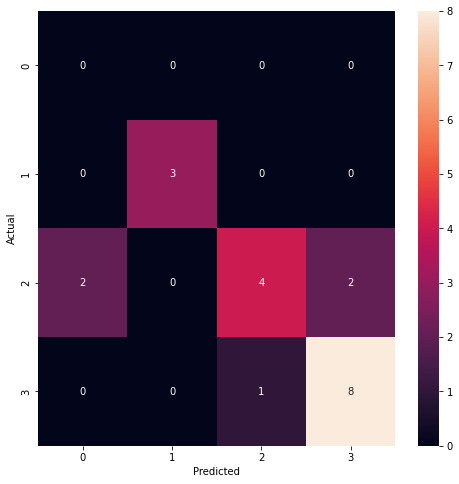

In [52]:
# 5. Hasil Uji
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = [
    "Nasional", 
    "Jateng-DIY", 
    "Nasional", 
    "Jateng-DIY", 
    "Ekonomi", 
    "Jateng-DIY", 
    "Ekonomi", 
    "Nasional",
    "Nasional",
    "Nasional",
    "Nasional",
    "Nasional",
    "Jateng-DIY",
    "Nasional",
    "Jateng-DIY",
    "Nasional",
    "Entertaintment",
    "Entertaintment",
    "Entertaintment",
    "Nasional",   
]

compare_y = pd.DataFrame(data={"Kategori Benar": y_pred, "Hasil Uji": y_test})
print(compare_y)

print ('\nHasil confusion matrix')
print (confusion_matrix(y_test, y_pred))
print (classification_report(y_test, y_pred))
print ('Akurasi')
print(accuracy_score(y_test, y_pred))

f, ax = plt.subplots(figsize=(8,8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", ax=ax)
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()


In [53]:
# Hasilnya :
# Jika K = 1 nilai Confusion = ?
classifierK1 = KNeighborsClassifier(n_neighbors=1)
classifierK1.fit(X,y_train)
y_testK1 = classifierK1.predict(test)
print ('Jika K = 1 nilai Confusion = ?\n')
print ('Confusion Matrix:')
print (confusion_matrix(y_testK1, y_pred))
print (classification_report(y_testK1, y_pred))
print ('Akurasi:')
print(accuracy_score(y_testK1, y_pred))

Jika K = 1 nilai Confusion = ?

Confusion Matrix:
[[0 0 0 0]
 [0 3 0 0]
 [2 0 4 2]
 [0 0 1 8]]
                precision    recall  f1-score   support

       Ekonomi       0.00      0.00      0.00         0
Entertaintment       1.00      1.00      1.00         3
    Jateng-DIY       0.80      0.50      0.62         8
      Nasional       0.80      0.89      0.84         9

      accuracy                           0.75        20
     macro avg       0.65      0.60      0.61        20
  weighted avg       0.83      0.75      0.78        20

Akurasi:
0.75


c:\users\rapiertech\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\rapiertech\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\rapiertech\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

In [54]:
# Jika K = 2 nilai Confusion = ?
classifierK2 = KNeighborsClassifier(n_neighbors=2)
classifierK2.fit(X,y_train)
y_testK2 = classifierK1.predict(test)
print ('Jika K = 2 nilai Confusion = ?\n')
print ('Confusion Matrix:')
print (confusion_matrix(y_testK2, y_pred))
print (classification_report(y_testK2, y_pred))
print ('Akurasi:')
print(accuracy_score(y_testK2, y_pred))

Jika K = 2 nilai Confusion = ?

Confusion Matrix:
[[0 0 0 0]
 [0 3 0 0]
 [2 0 4 2]
 [0 0 1 8]]
                precision    recall  f1-score   support

       Ekonomi       0.00      0.00      0.00         0
Entertaintment       1.00      1.00      1.00         3
    Jateng-DIY       0.80      0.50      0.62         8
      Nasional       0.80      0.89      0.84         9

      accuracy                           0.75        20
     macro avg       0.65      0.60      0.61        20
  weighted avg       0.83      0.75      0.78        20

Akurasi:
0.75


c:\users\rapiertech\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\rapiertech\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\rapiertech\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

In [55]:
# Jika K = 3 nilai Confusion = ?
classifierK3 = KNeighborsClassifier(n_neighbors=3)
classifierK3.fit(X,y_train)
y_testK3 = classifierK1.predict(test)
print ('Jika K = 3 nilai Confusion = ?\n')
print ('Confusion Matrix:')
print (confusion_matrix(y_testK3, y_pred))
print (classification_report(y_testK3, y_pred))
print ('Akurasi:')
print(accuracy_score(y_testK3, y_pred))

Jika K = 3 nilai Confusion = ?

Confusion Matrix:
[[0 0 0 0]
 [0 3 0 0]
 [2 0 4 2]
 [0 0 1 8]]
                precision    recall  f1-score   support

       Ekonomi       0.00      0.00      0.00         0
Entertaintment       1.00      1.00      1.00         3
    Jateng-DIY       0.80      0.50      0.62         8
      Nasional       0.80      0.89      0.84         9

      accuracy                           0.75        20
     macro avg       0.65      0.60      0.61        20
  weighted avg       0.83      0.75      0.78        20

Akurasi:
0.75


c:\users\rapiertech\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\rapiertech\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\rapiertech\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m